In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

# **Seabron intro**

In [2]:
cars = sns.load_dataset('mpg')
type(cars)

pandas.core.frame.DataFrame

In [3]:
cars.dropna(inplace=True)
cars.shape

(392, 9)

In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


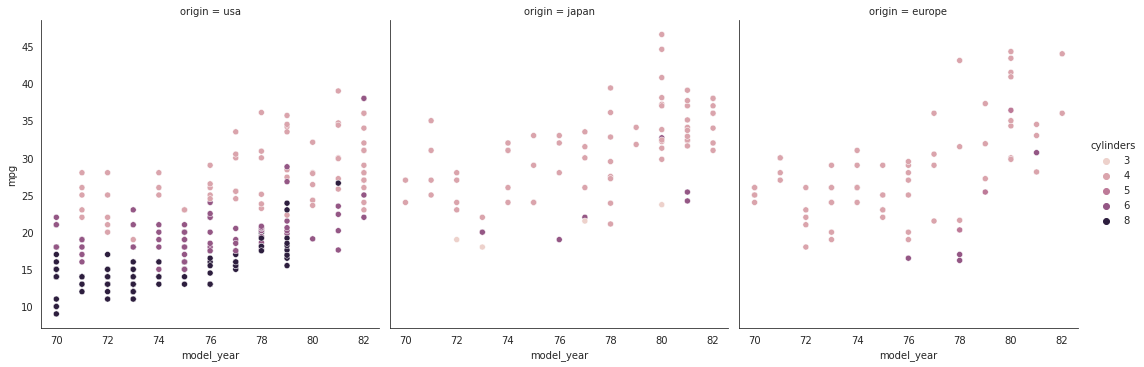

In [ ]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', 
            data=cars);

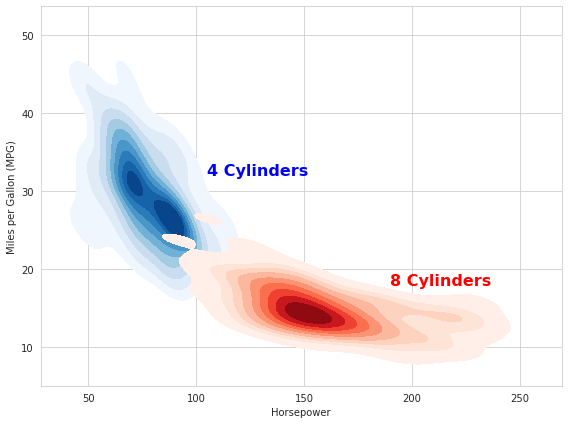

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

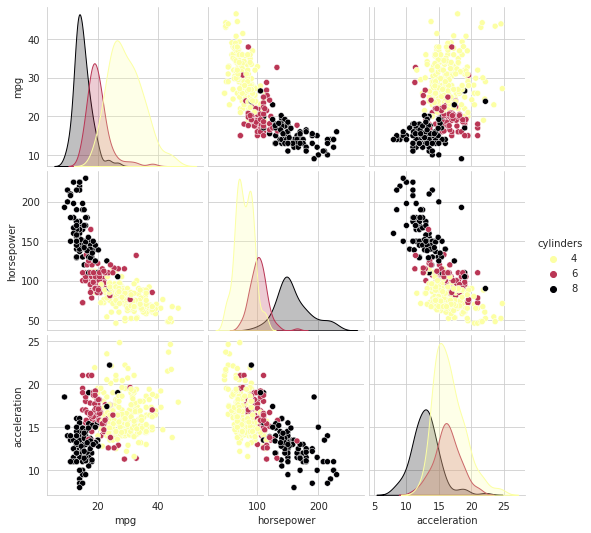

In [ ]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='inferno_r'
            );

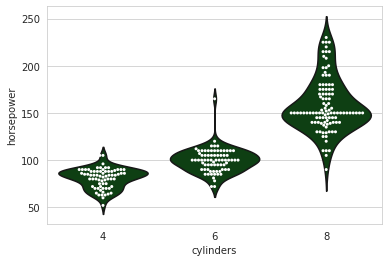

In [ ]:
usa = cars[cars.origin == 'usa']
sns.violinplot(x=usa.cylinders, y=usa.horsepower, scale='width', inner=None, color='xkcd:forest green')
sns.swarmplot(x=usa.cylinders, y=usa.horsepower, color='white', size=3);

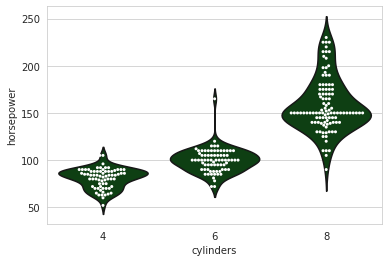

In [ ]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower, scale='width', inner=None, color='xkcd:forest green')
sns.swarmplot(x=usa.cylinders, y=usa.horsepower, color='white', size=3);

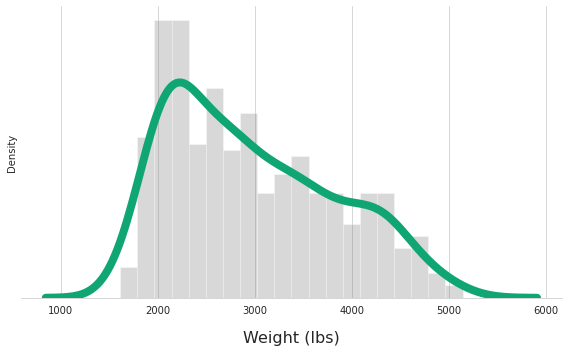

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(cars.weight, bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'} )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout();

<Figure size 576x432 with 0 Axes>

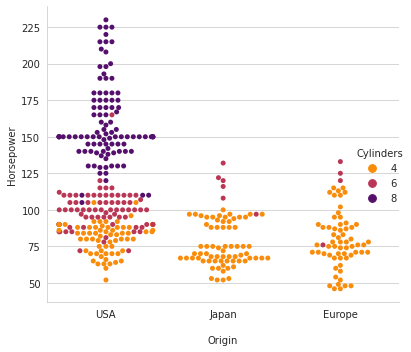

In [ ]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='origin', y='horsepower', hue='cylinders', 
                kind='swarm', 
                palette=sns.color_palette('inferno_r', 3,),
                data=cars[cars.cylinders.isin([4, 6, 8])]
               )

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
g._legend.set_title('Cylinders')
plt.tight_layout();

# **Seaborn: KDEplot**

In [ ]:
cars = sns.load_dataset('mpg').dropna()
print(cars.shape)
cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
hp = cars.horsepower

sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

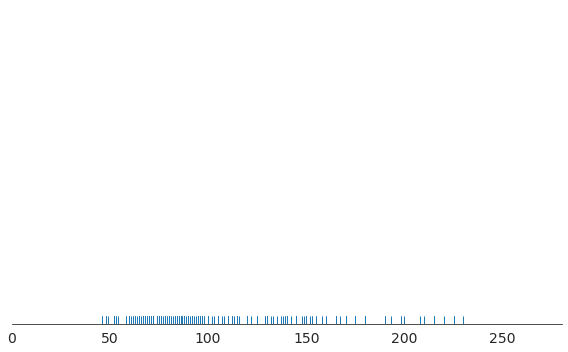

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde=False, hist=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

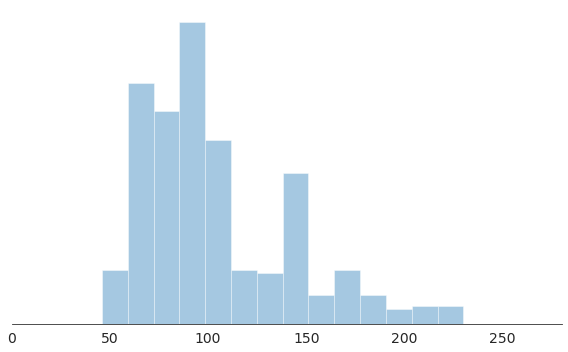

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

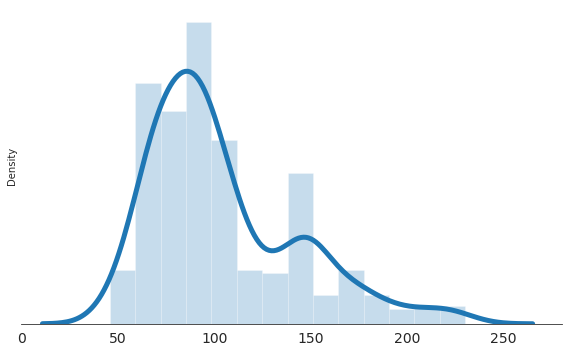

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

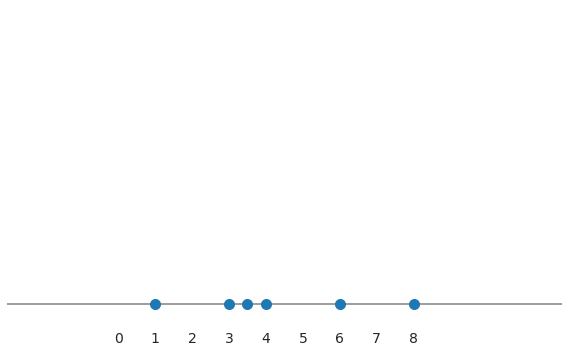

In [ ]:
import numpy as np
import scipy.stats as stats

blue, orange, green, red = sns.color_palette()[:4]
pts = [1, 3, 3.5, 4, 6, 8]
plt.figure(figsize=(8, 5))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();


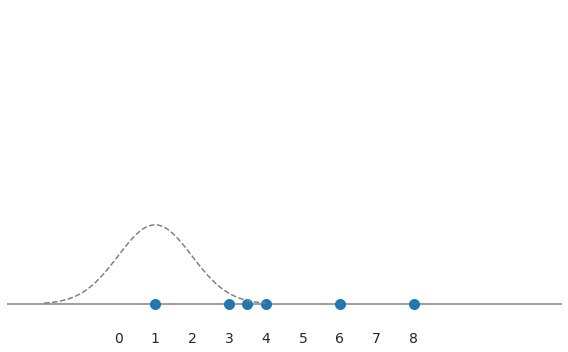

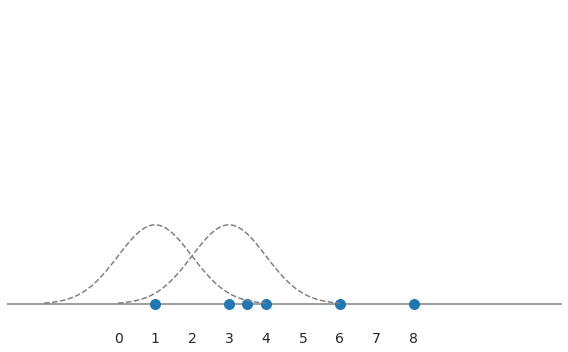

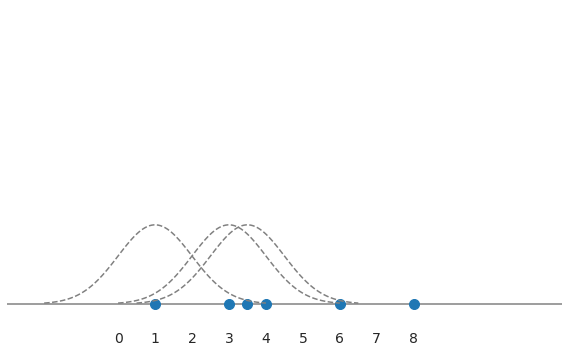

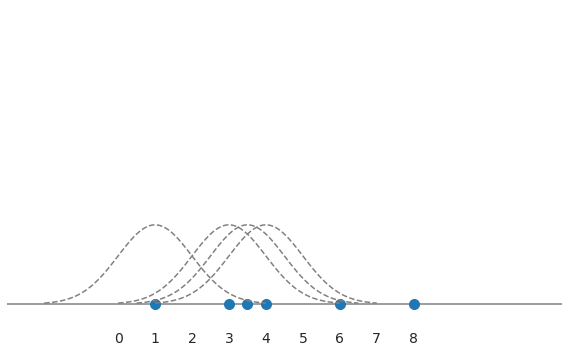

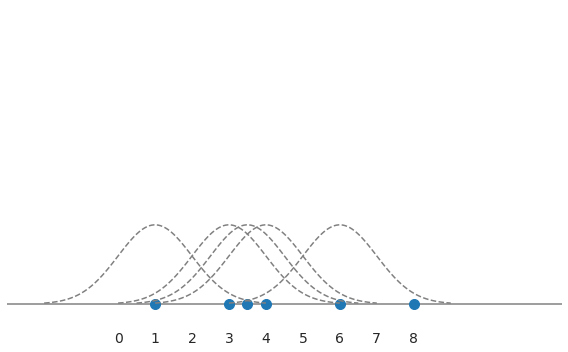

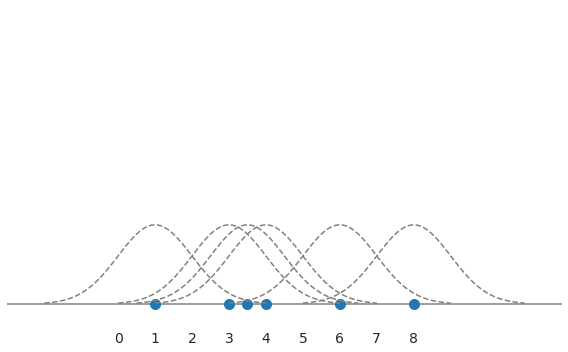

In [ ]:
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_kernel{i}.svg');

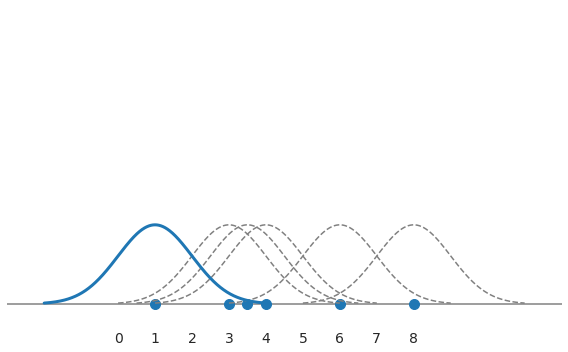

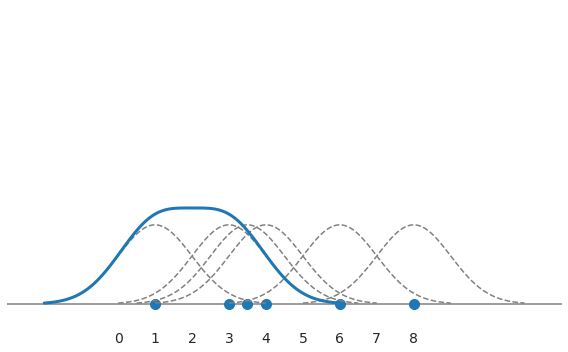

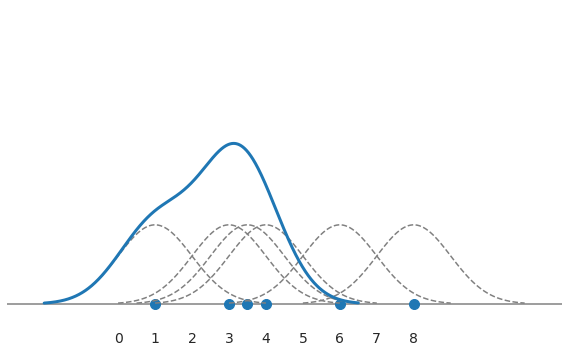

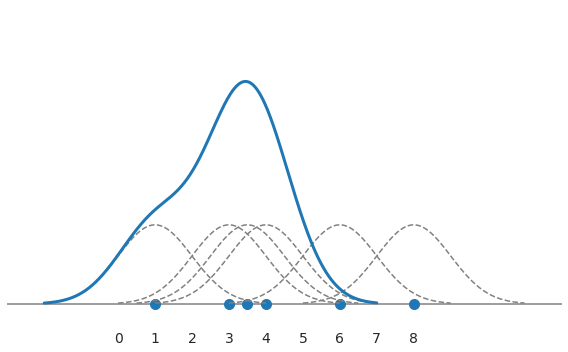

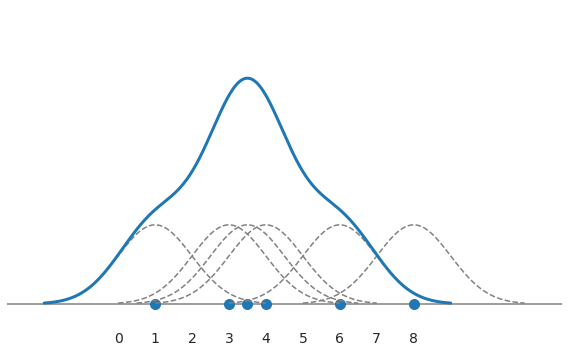

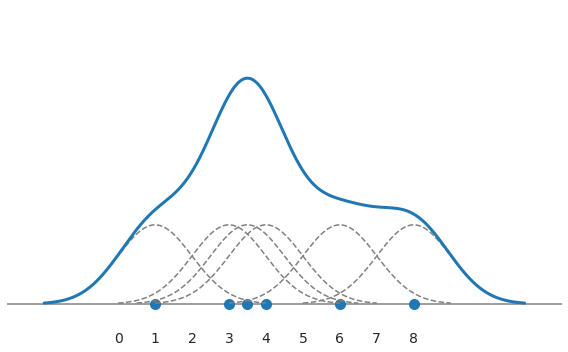

In [ ]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color=blue, lw=3)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_addkernel{i}.svg');

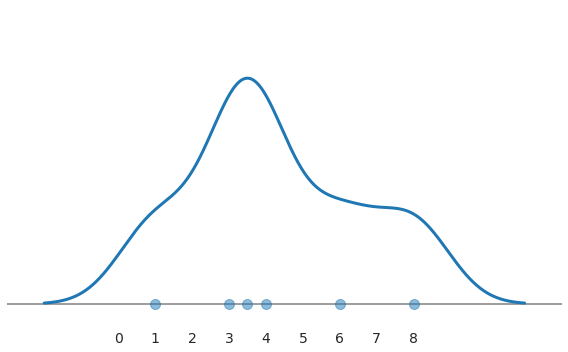

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color=blue, lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

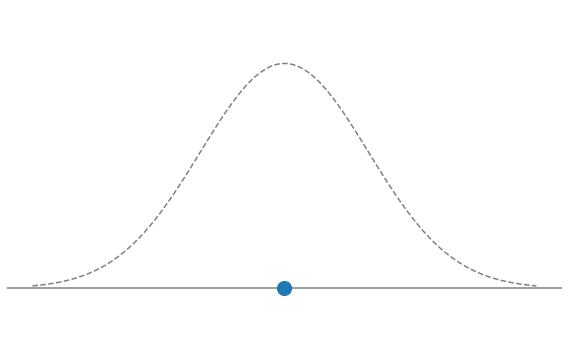

In [ ]:
# Other kernels
plt.figure(figsize=(8, 5))

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)

plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

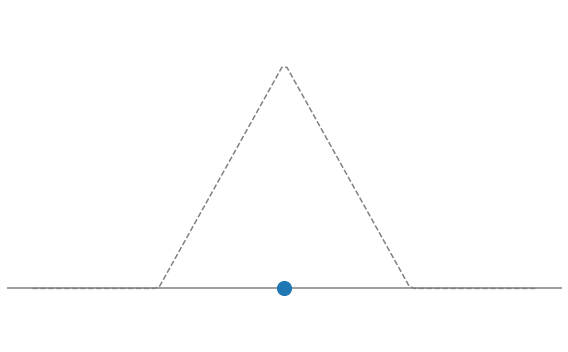

In [ ]:
plt.figure(figsize=(8, 5))

def build_tri_kernel(x, center=0, sigma=1):
    m = 0.4/sigma
    if x < (center-sigma):
        return 0
    elif x < center:
        return m*x + m*(sigma-center)
    elif x < (center+sigma):
        return -m*x + m*(sigma + center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_tri_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

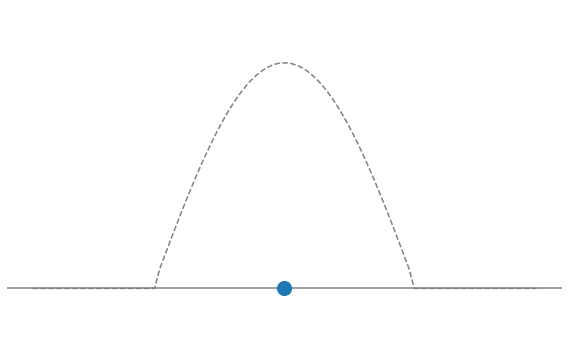

In [ ]:
plt.figure(figsize=(8, 5))

def build_cos_kernel(x, center=0, sigma=1):
    if np.abs(x - center) < sigma:
        return 0.4*np.cos(x-center)
    else:
        return 0  

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_cos_kernel(val, center=mu, sigma=1.5) for val in x], 
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

## **Univariate(1D)**

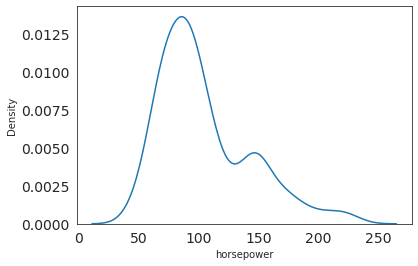

In [ ]:
sns.kdeplot(cars.horsepower);

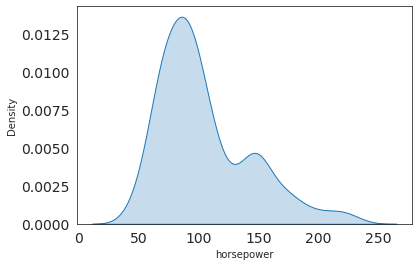

In [ ]:
sns.kdeplot(cars.horsepower, shade=True);

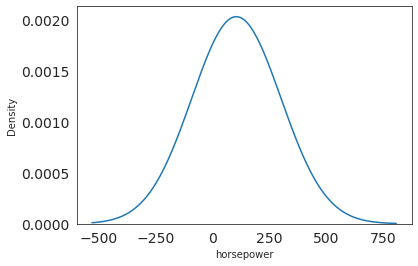

In [ ]:
sns.kdeplot(cars.horsepower, bw=5);

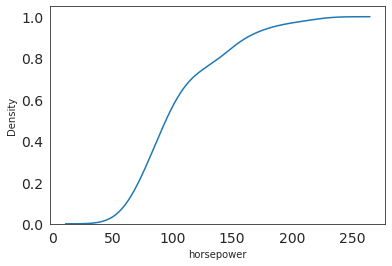

In [ ]:
sns.kdeplot(cars.horsepower, cumulative=True);

In [ ]:
# Bandwidth Widget
from ipywidgets import interact, interactive, HBox, VBox, interactive_output
from IPython.display import display
def bandwidth_widget(bw=10):
    sns.kdeplot(cars.horsepower, bw=bw, lw=3, shade=True)
    plt.xlim(-30, 300)
    plt.ylim(0, 0.03)
interactive(bandwidth_widget, bw=(1, 30, 1))


interactive(children=(IntSlider(value=10, description='bw', max=30, min=1), Output()), _dom_classes=('widget-i…

## **Bivariate (2D)**

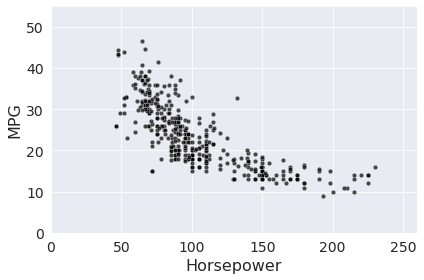

In [ ]:
sns.set_style('darkgrid')
#sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)
plt.tight_layout();

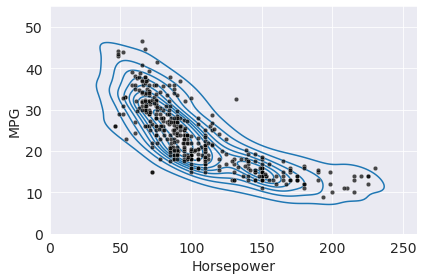

In [ ]:
sns.kdeplot(cars.horsepower, cars.mpg)
sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

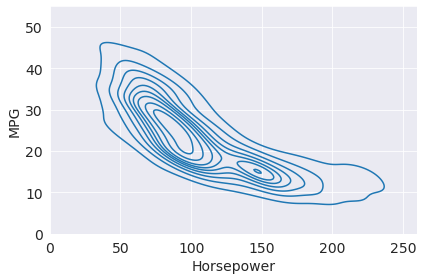

In [ ]:
sns.kdeplot(cars.horsepower, cars.mpg)
#sns.scatterplot(cars.horsepower, cars.mpg, color='black', alpha=0.7, s=20, zorder=10)
plt.xlim(0, 260)
plt.ylim(0, 55)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout();

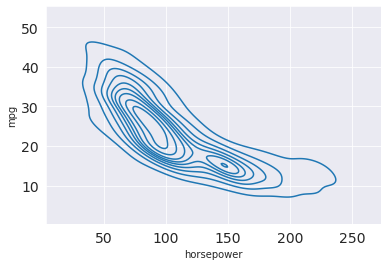

In [ ]:
# Bivariate demo
sns.kdeplot(cars.horsepower, cars.mpg);

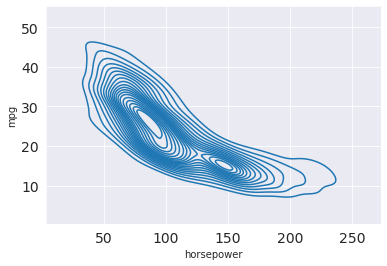

In [ ]:
sns.kdeplot(cars.horsepower, cars.mpg, n_levels=20);

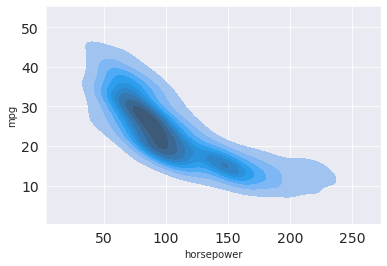

In [ ]:
sns.kdeplot(cars.horsepower, cars.mpg, shade=True);

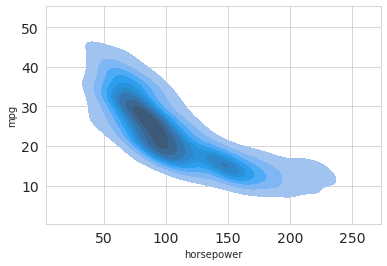

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(cars.horsepower, cars.mpg, shade=True, shade_lowest=False);

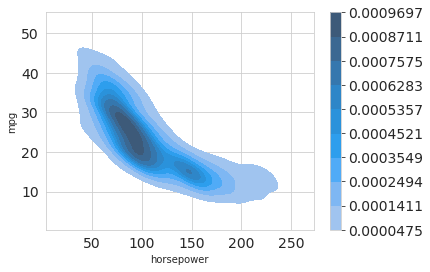

In [ ]:
sns.kdeplot(cars.horsepower, cars.mpg, 
            shade=True, 
            shade_lowest=False,
            cbar=True
           );

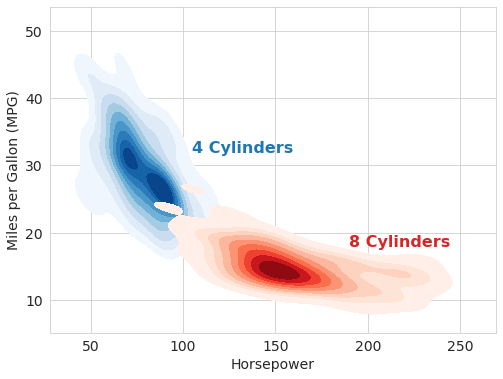

In [ ]:
# Bivariate KDEplot by Category
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color=blue, fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color=red, fontsize=16, fontweight='bold');

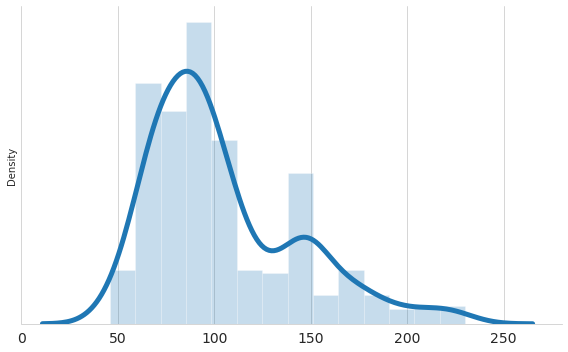

In [ ]:
# Other Figures that use KDE
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

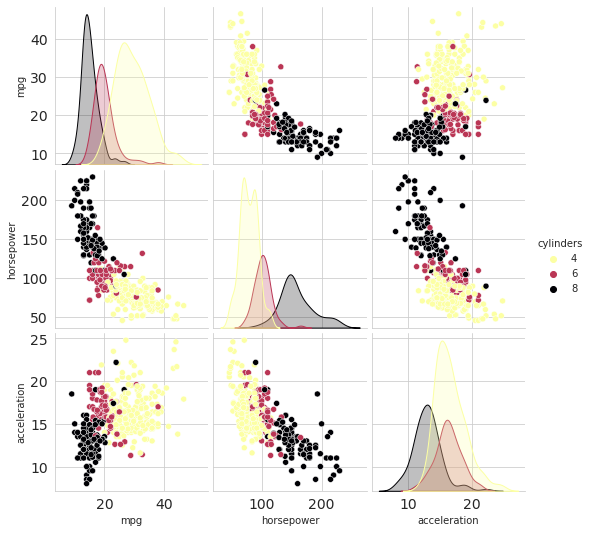

In [ ]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], hue='cylinders', vars=['mpg', 'horsepower', 'acceleration'], palette='inferno_r');

# **Seaborn: distplot**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
cars = sns.load_dataset('mpg').dropna()
print(cars.shape)
cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


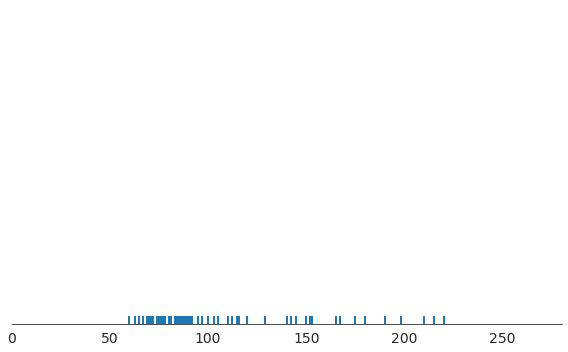

In [ ]:
sns.set_style('white')
hp = cars.horsepower.sample(100, random_state=100)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde=False, hist=False, rug_kws={'lw': 2})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

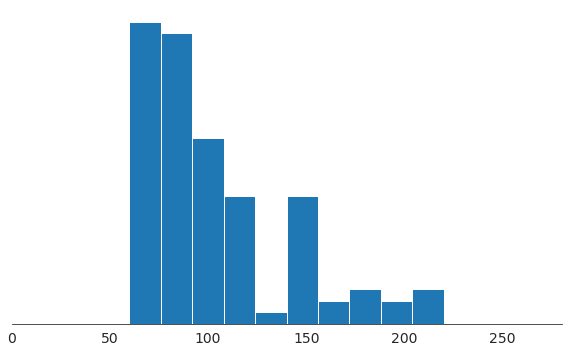

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde=False, hist_kws={'alpha': 1})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

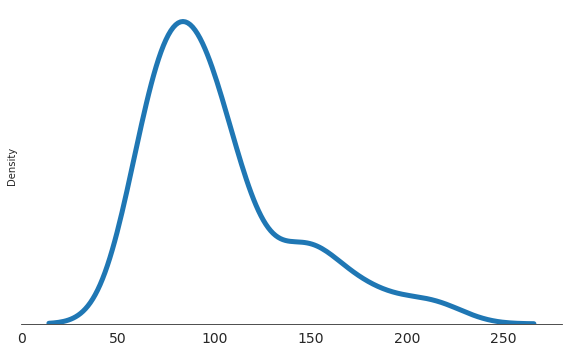

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, hist=False, kde_kws={'lw': 5})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

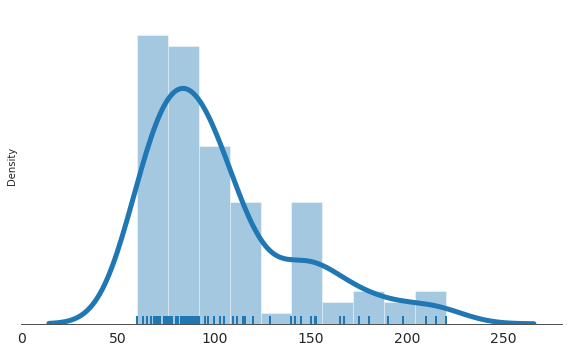

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde_kws={"lw": 5}, rug_kws={'lw': 2} )

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

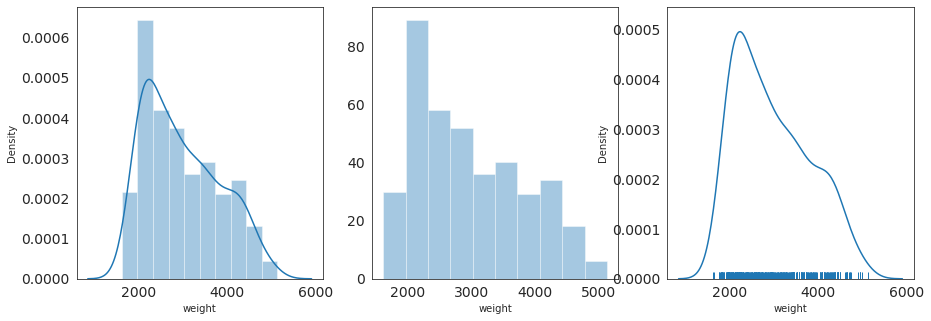

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(cars.weight);
plt.subplot(132)
sns.distplot(cars.weight, kde=False);
plt.subplot(133)
sns.distplot(cars.weight, hist=False, rug=True); 

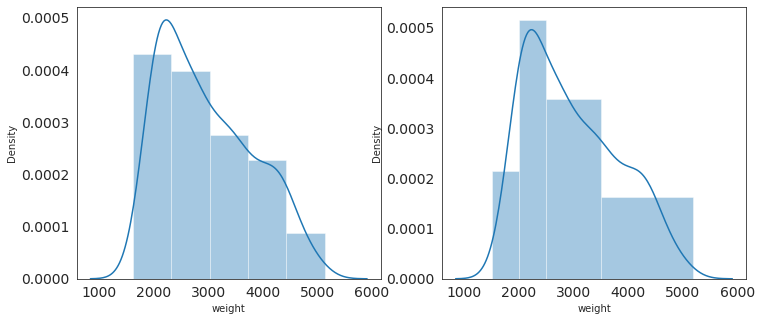

In [ ]:
# bins
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(cars.weight, bins=5);  
plt.subplot(122)
sns.distplot(cars.weight, bins=[1500, 2000, 2500, 3500, 5200]);

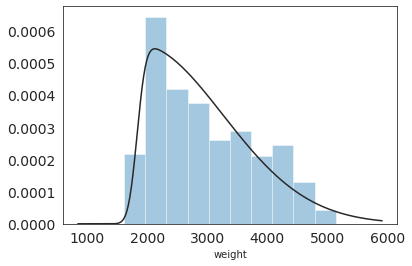

In [ ]:
# Fit
from scipy.stats import skewnorm
sns.distplot(cars.weight, fit=skewnorm, kde=False);

## **kwargs**

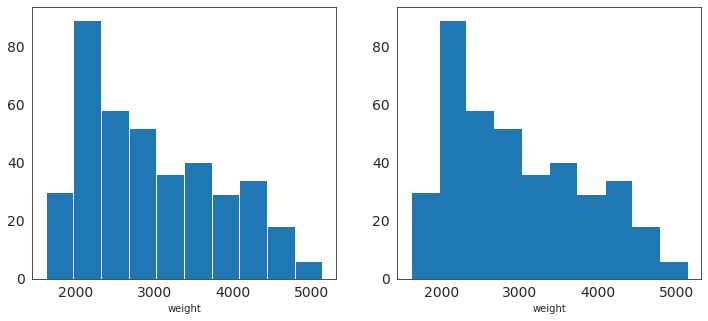

In [ ]:
# hist_kws
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(cars.weight, kde=False, hist_kws={'alpha': 1});
plt.subplot(122)
sns.distplot(cars.weight, kde=False, hist_kws={'alpha': 1, 'histtype': 'stepfilled'});

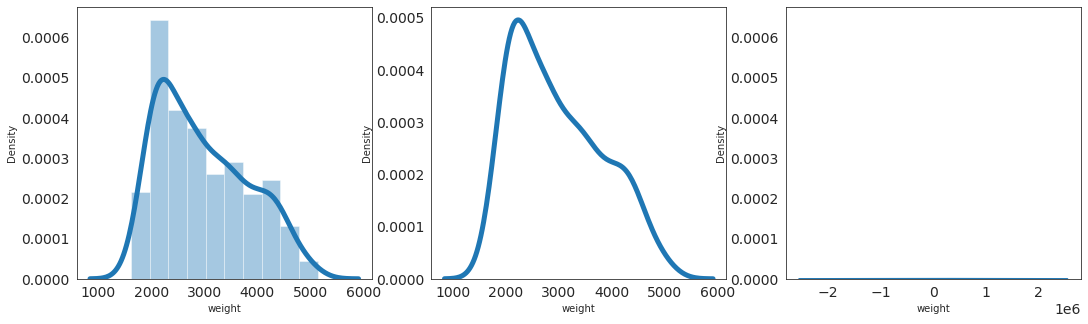

In [ ]:
# kde_kws
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.distplot(cars.weight, kde_kws={'lw': 5});
plt.subplot(132)
sns.kdeplot(cars.weight, lw=5);  
plt.subplot(133)
sns.distplot(cars.weight, kde_kws={'bw': 1000});

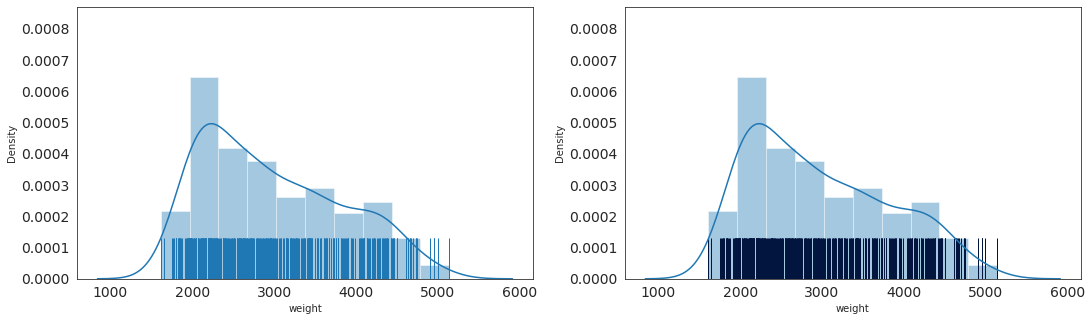

In [ ]:
# rug_kws
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.distplot(cars.weight, rug=True, rug_kws={'height': 0.15});
plt.subplot(122)
sns.distplot(cars.weight, rug=True, rug_kws={'height': 0.15, 'color': 'xkcd:navy'});

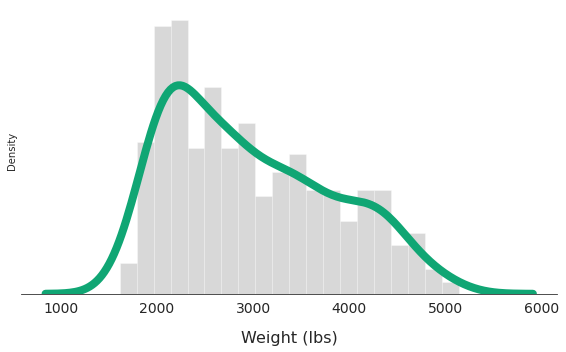

In [ ]:
# Styled Distplots
sns.set_style('white')

plt.figure(figsize=(8,5))
sns.distplot(cars.weight, 
             bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'}
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout()

plt.savefig('03dist_styleWeight_greenKDE.svg');

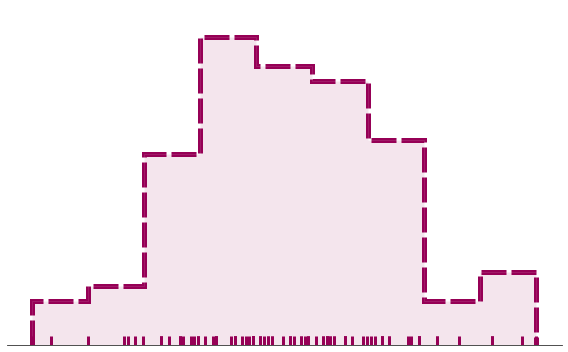

In [ ]:
sns.set_style('white')

plt.figure(figsize=(8,5))
sns.distplot(cars.acceleration.sample(100, random_state=100), 
             rug=True,
             kde=False,
             hist_kws={'lw': 5, 
                       'linestyle': (0, (5, 1)),
                       'alpha': 1, 
                       'histtype':'step', 
                       'color':'xkcd:dark magenta'},
             rug_kws={'lw': 3,
                      'color':'xkcd:dark magenta'}
            )
sns.distplot(cars.acceleration.sample(100, random_state=100), 
             kde=False,
             hist_kws={'alpha': 0.1,
                       'histtype':'stepfilled', 
                       'color':'xkcd:dark magenta'},
            )

sns.despine(left=True)
plt.xlabel('')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('03dist_styleAcc_pink.svg');

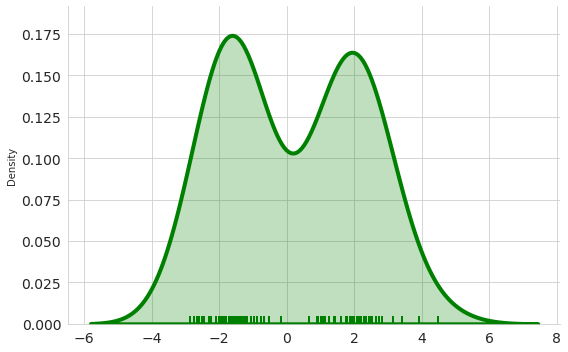

In [ ]:
import random
random.seed(11)

data = [random.gauss(2, 0.75) for _ in range(50)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

sns.set_style('whitegrid')

plt.figure(figsize=(8,5))
sns.distplot(data, 
             rug=True,
             hist=False, 
             color='green',
             kde_kws={'lw':4, 'shade':True, 'bw':.5},
             rug_kws={'lw':2}
            )

sns.despine()
plt.xlabel('')
plt.tight_layout()

#plt.savefig('03dist_styleRand_greenKDErug.svg');

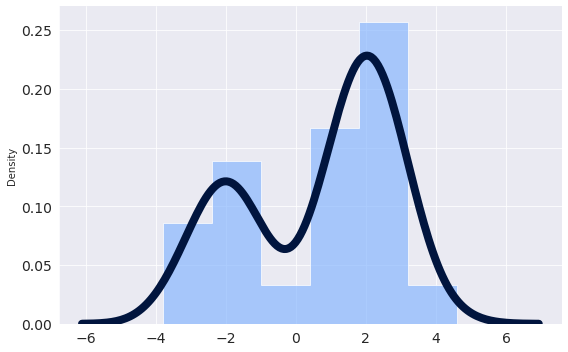

In [ ]:
sns.set_style('darkgrid')

data = [random.gauss(2, 0.75) for _ in range(100)]
data.extend([random.gauss(-2, 0.75) for _ in range(50)])

plt.figure(figsize=(8,5))
sns.distplot(data, 
             hist_kws={'histtype': 'stepfilled', 
                       'alpha':0.7, 'color':'xkcd:carolina blue'},
             kde_kws={'lw':8,'color':'xkcd:navy'}
            )

sns.despine()
plt.xlabel('')
plt.tight_layout()

#plt.savefig('03dist_styleRand_carolina.svg');

# **Seaborn: boxplot**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

cars = sns.load_dataset('mpg').dropna()
print(cars.shape)

cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


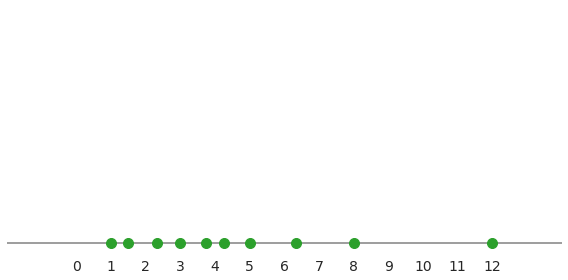

In [ ]:
import pandas as pd
import numpy as np
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

blue, orange, green, red = sns.color_palette()[:4]
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

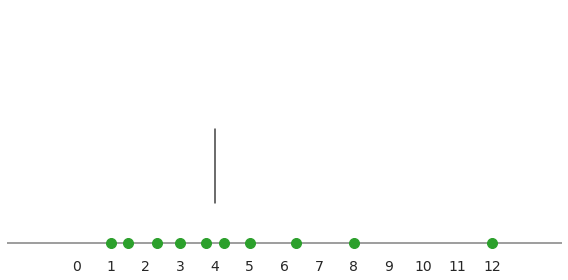

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  #median at 4
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

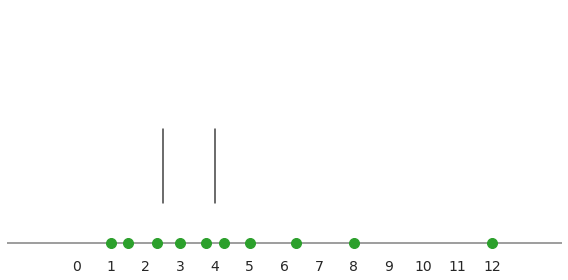

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E') 
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E') #25th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

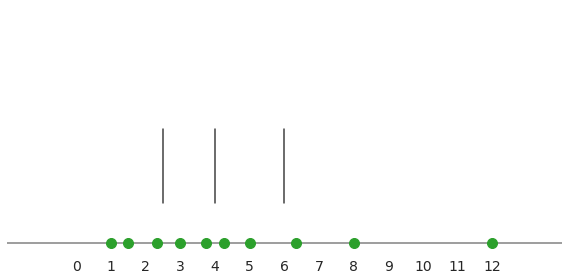

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')  
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')   #75th percentile
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

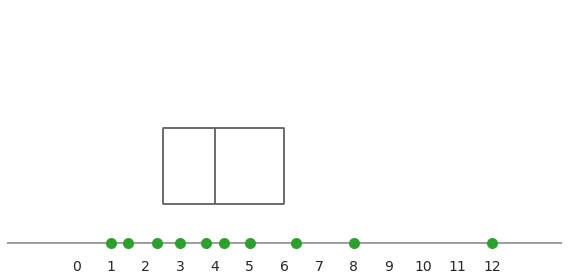

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')  #connect box
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

In [ ]:
xvals=np.linspace(2.5, 6, 100)

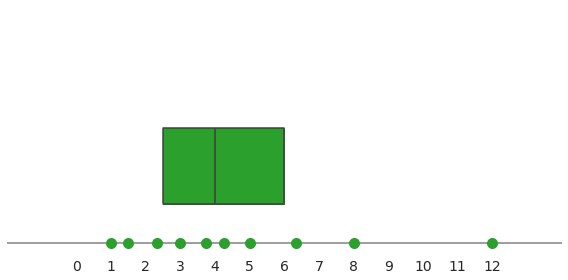

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)  #add color
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

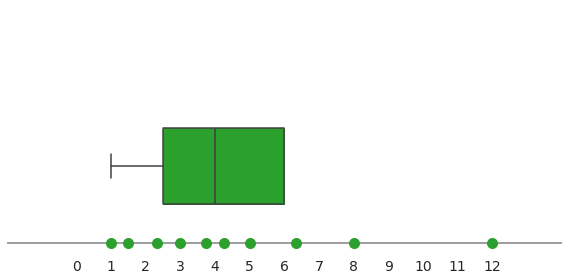

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E') #add lower whisker
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')            #add lower whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)    
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

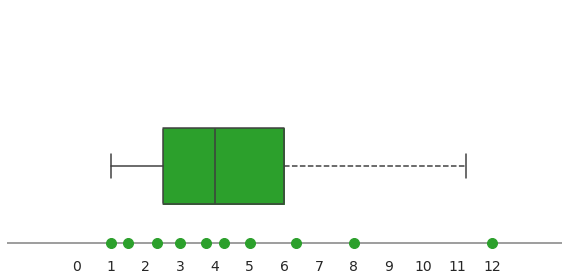

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(13.25/16), color='#3E3E3E', linestyle='--')  #add hypothetical upper whisker
plt.axvline(11.25, ymin=0.3, ymax=0.4, color='#3E3E3E')    #add hypothetical upper whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

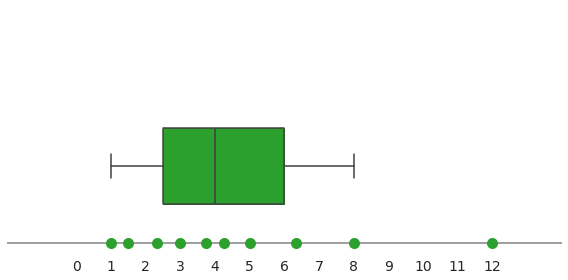

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E') #add upper whisker
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')           #add upper whisker
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

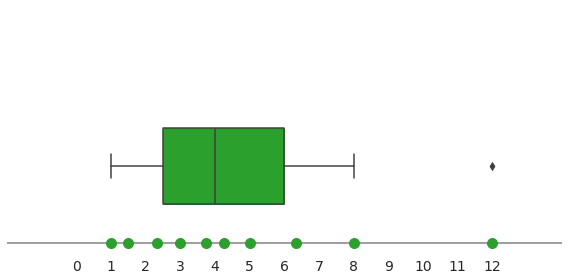

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, color=green)
plt.axvline(4, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(2.5, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axvline(6, ymin=0.2, ymax=0.5, color='#3E3E3E')
plt.axhline(0.092, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.268, xmin=(4.5/16), xmax=0.5, color='#3E3E3E')
plt.axhline(0.18, xmin=(3/16), xmax=(4.5/16), color='#3E3E3E')
plt.axvline(1, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.axhline(0.18, xmin=(8/16), xmax=(10/16), color='#3E3E3E')
plt.axvline(8, ymin=0.3, ymax=0.4, color='#3E3E3E')
plt.scatter(12, 0.18, marker="d", s=30, color='#3E3E3E')  #add flier
plt.gca().fill_between(xvals, 0.092, 0.268, color=green)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.02, 0.55)
plt.xlim(-2, 14)
plt.box(False)
plt.xticks(range(13))
plt.yticks([])
plt.tight_layout();

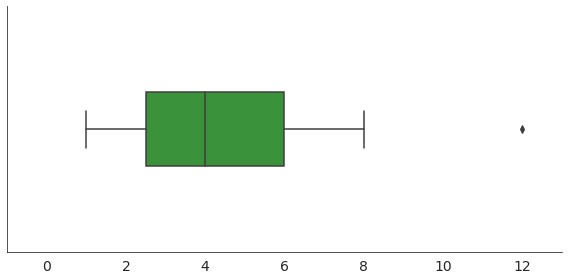

In [ ]:
#check manual against seaborn plot
plt.figure(figsize=(8,4))
sns.boxplot(pts, color=green, width=0.3)
sns.despine()
plt.xlim(-1, 13)
plt.tight_layout();

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
# Basics
sns.set_style('whitegrid')
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [ ]:
cars = cars[cars.cylinders.isin([4,6,8])]
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
cars.mpg.describe()

count    385.000000
mean      23.445455
std        7.836911
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

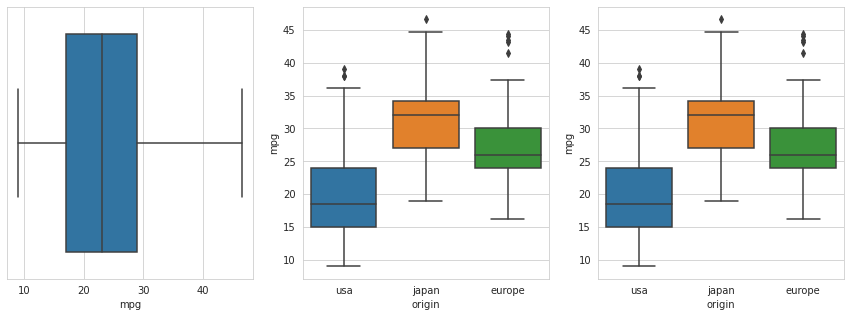

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(cars.mpg);
plt.subplot(132)
sns.boxplot(x=cars.origin, y=cars.mpg);
plt.subplot(133)
sns.boxplot(x='origin', y='mpg', data=cars);

## **Hue**

In [ ]:
cars.model_year.describe()

count    385.000000
mean      75.961039
std        3.692058
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

In [ ]:
cars['newer_model'] = cars.model_year > 76
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,newer_model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,False
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,False
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,False
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,True
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,True
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,True
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,True


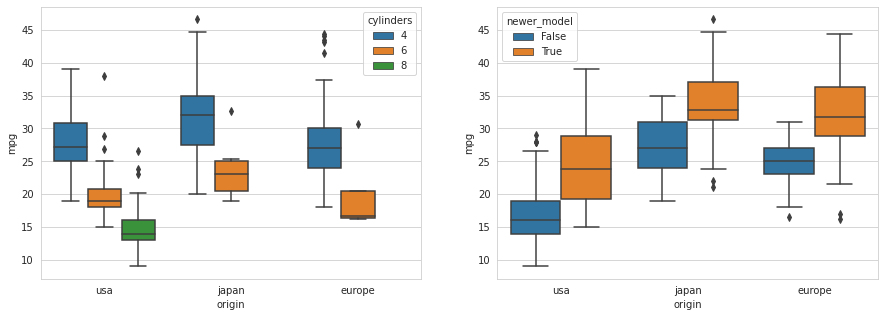

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='origin', y='mpg', hue='cylinders', data=cars);
plt.subplot(122)
sns.boxplot(x='origin', y='mpg', hue='newer_model', data=cars);

## **Styling Options**

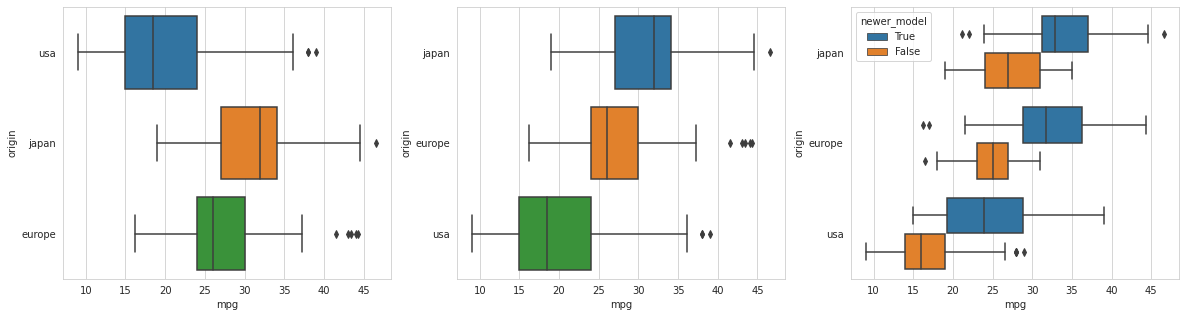

In [ ]:
# order
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(x='mpg', y='origin', data=cars);

plt.subplot(132)
sns.boxplot(x='mpg', y='origin', data=cars, order=['japan', 'europe', 'usa']);

plt.subplot(133)
sns.boxplot(x='mpg', y='origin', hue='newer_model', data=cars,
            order=['japan', 'europe', 'usa'], hue_order=[True, False]);           

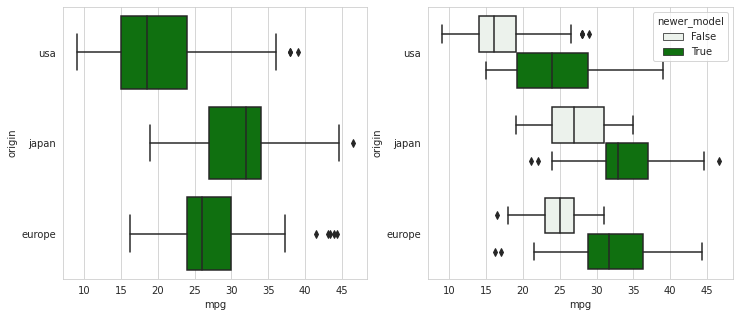

In [ ]:
# color
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x='mpg', y='origin', data=cars, color='g');
plt.subplot(122)
sns.boxplot(x='mpg', y='origin', hue='newer_model', data=cars,color='g');

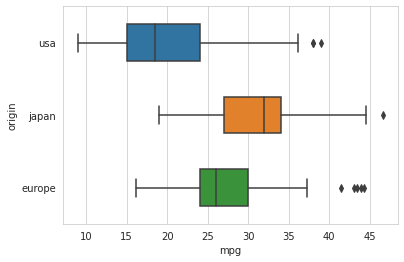

In [ ]:
# width
sns.boxplot(x='mpg', y='origin',data=cars, width=0.5 ); 

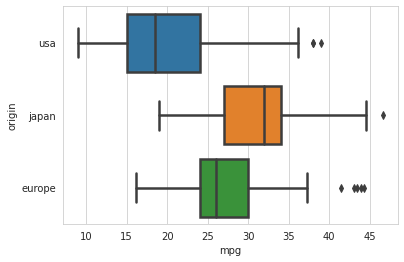

In [ ]:
# linewidth
sns.boxplot(x='mpg', y='origin',data=cars, linewidth=2.5 );

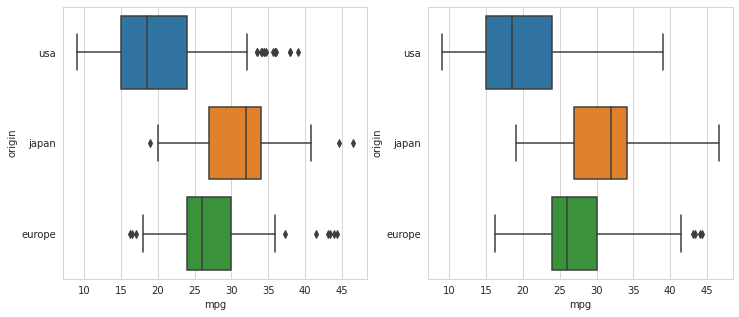

In [ ]:
# whis
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x='mpg', y='origin', data=cars, whis=1 );
plt.subplot(122)
sns.boxplot(x='mpg', y='origin',data=cars, whis=2 );

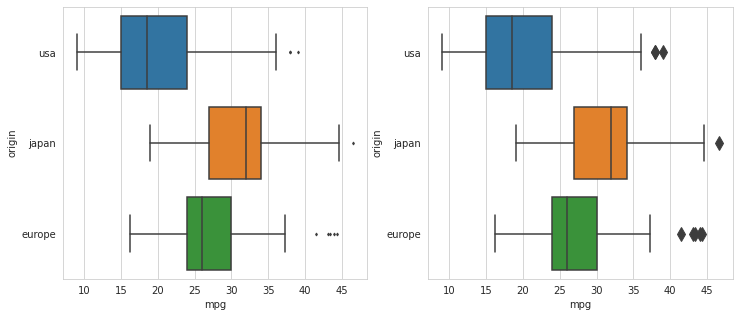

In [ ]:
# fliersize
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x='mpg', y='origin', data=cars, fliersize=2 );
plt.subplot(122)
sns.boxplot(x='mpg', y='origin', data=cars, fliersize=10 );

Check the [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for even more styling options

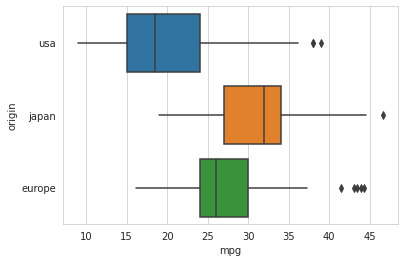

In [ ]:
# showcaps
sns.boxplot(x='mpg', y='origin', data=cars, showcaps=False);

# **Seaborn: violinplot**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
cars = sns.load_dataset('mpg').dropna()
print(cars.shape)
cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
import pandas as pd
import numpy as np
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

blue, orange, green, red = sns.color_palette()[:4]
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]
pd.Series(pts).describe()

count    10.000000
mean      4.716667
std       3.341010
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      12.000000
dtype: float64

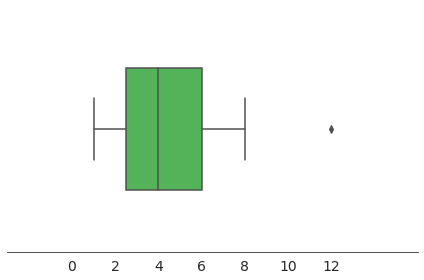

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(pts, color='#44C34A', width=0.5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

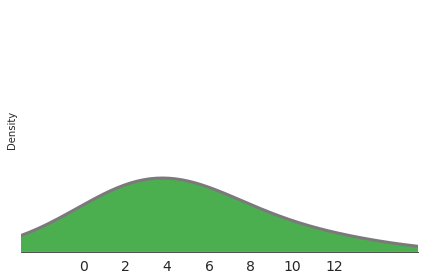

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(pts, color='#4BAF50', shade=True, alpha=1, bw=1)
sns.kdeplot(pts, color='#7A7A7A', zorder=2, lw=3, bw=1)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.ylim(None, 0.3)
plt.xticks(range(0,13,2))
plt.yticks([])
plt.tight_layout();

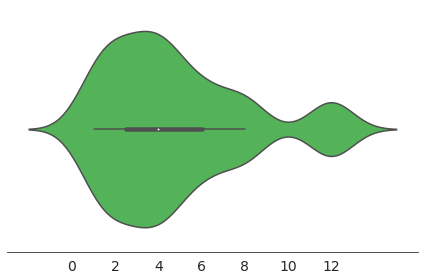

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

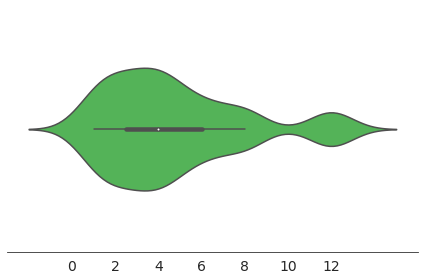

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(pts, color='#44C34A', bw=0.3, cut=3, width=0.5)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

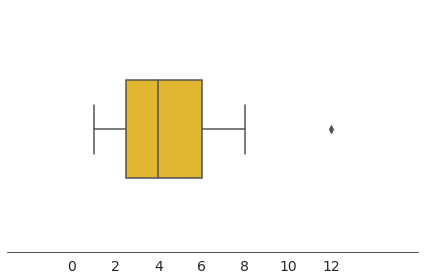

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=0.4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

## **Basics**

In [ ]:
sns.set_style('whitegrid')
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

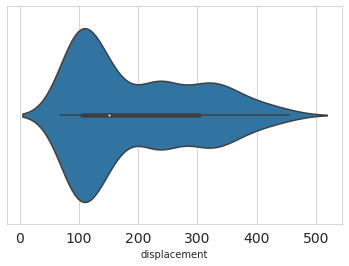

In [ ]:
cars = cars[cars.cylinders.isin([4,6,8])]
sns.violinplot(cars.displacement);

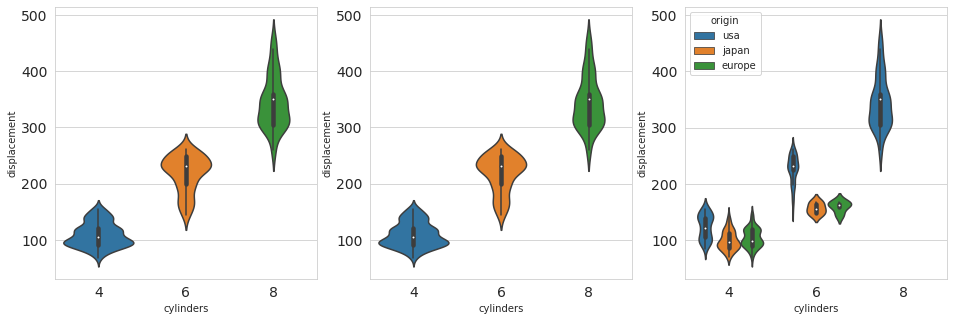

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.violinplot(x=cars.cylinders, y=cars.displacement);
plt.subplot(132)
sns.violinplot(x='cylinders', y='displacement', data=cars);
plt.subplot(133)
sns.violinplot(x='cylinders', y='displacement', hue='origin', data=cars );

## **Violinplot Options**

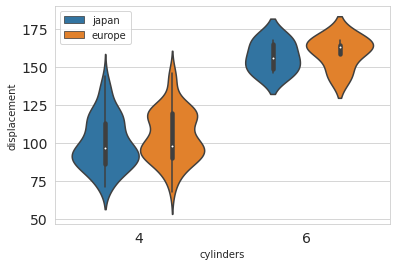

In [ ]:
sns.violinplot(x='cylinders', y='displacement', 
               hue='origin',data=cars[cars.origin.isin(['japan', 'europe'])] )
plt.legend(loc=2);

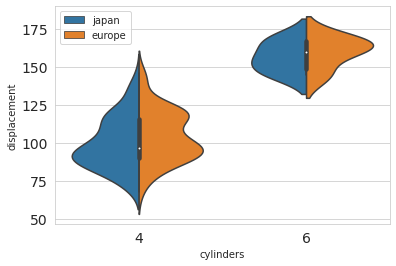

In [ ]:
# split
sns.violinplot(x='cylinders', y='displacement', 
               hue='origin',data=cars[cars.origin.isin(['japan', 'europe'])],split=True )
plt.legend(loc=2);

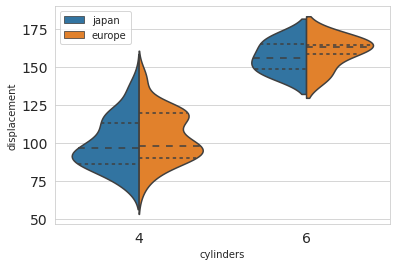

In [ ]:
# inner
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               inner='quartiles'
              )

plt.legend(loc=2);

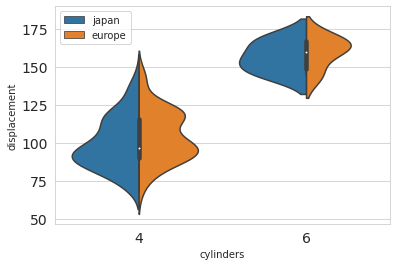

In [ ]:
# scale
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               scale='count'
              )

plt.legend(loc=2);

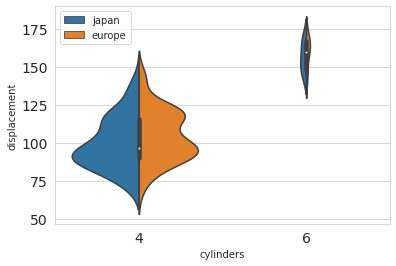

In [ ]:
sns.violinplot(x='cylinders', y='displacement', hue='origin',
               data=cars[cars.origin.isin(['japan', 'europe'])],
               split=True,
               scale='count',
               scale_hue=False
              )

plt.legend(loc=2);

In [ ]:
(
    cars[cars.origin.isin(['japan', 'europe'])]
    .groupby('cylinders')
    .origin
    .value_counts()
)

cylinders  origin
4          japan     69
           europe    61
6          japan      6
           europe     4
Name: origin, dtype: int64

## **Styling**

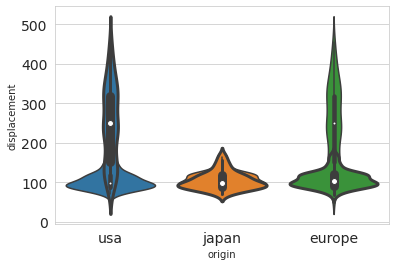

In [ ]:
# Box option
sns.violinplot(x=cars.origin, y=cars.displacement,
               order=['japan', 'europe', 'usa']);

sns.violinplot(x=cars.origin, y=cars.displacement, 
               linewidth=3 );

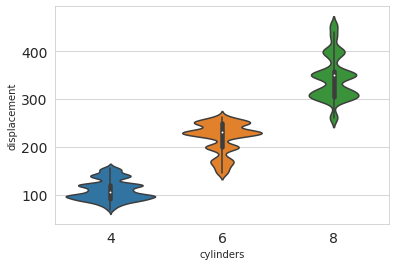

In [ ]:
# KDE options
sns.violinplot(x=cars.cylinders, y=cars.displacement,
               bw=0.2);

# **swarmplot**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
cars = sns.load_dataset('mpg').dropna()
print(cars.shape)
cars.head()

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
sns.set_style('whitegrid')
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

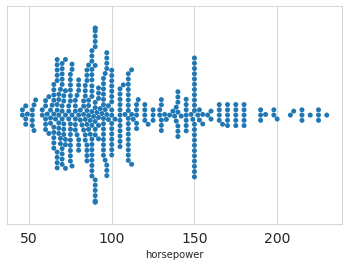

In [ ]:
cars = cars[cars.cylinders.isin([4,6,8])]
sns.swarmplot(cars.horsepower);

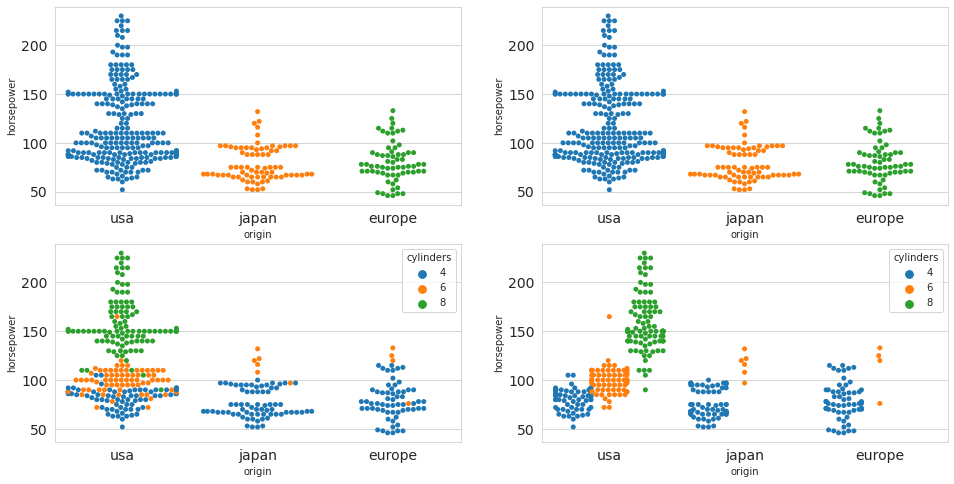

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.swarmplot(x=cars.origin, y=cars.horsepower);
plt.subplot(222)
sns.swarmplot(x='origin', y='horsepower',data=cars);

plt.subplot(223)
sns.swarmplot(x='origin', y='horsepower', hue='cylinders', data=cars );
plt.subplot(224)
sns.swarmplot(x='origin', y='horsepower', hue='cylinders', data=cars, dodge=True );

## **Swarmplot Overlay**

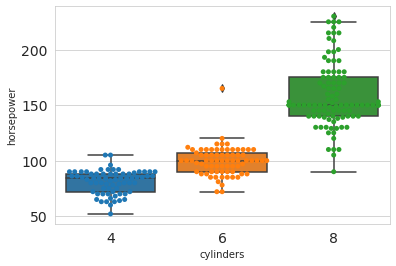

In [ ]:
usa = cars[cars.origin=='usa']
sns.boxplot(x=usa.cylinders, y=usa.horsepower)
sns.swarmplot(x=usa.cylinders, y=usa.horsepower);

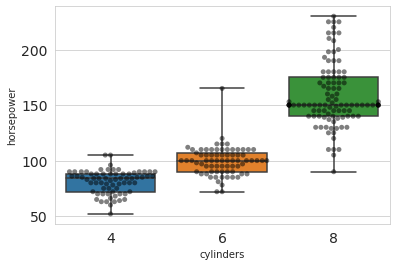

In [ ]:
sns.boxplot(x=usa.cylinders, y=usa.horsepower,whis=np.inf)
sns.swarmplot(x=usa.cylinders, y=usa.horsepower, color='black', alpha=0.5);

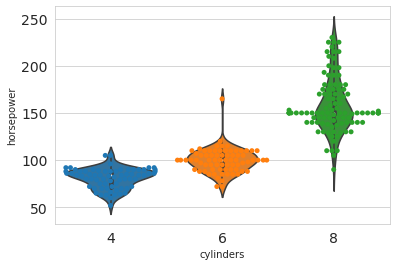

In [ ]:
sns.violinplot(x=usa.cylinders, y=usa.horsepower)
sns.swarmplot(x=usa.cylinders, y=usa.horsepower);

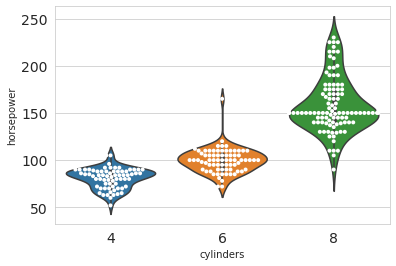

In [ ]:
sns.violinplot(x=usa.cylinders, y=usa.horsepower,scale='width')
sns.swarmplot(x=usa.cylinders, y=usa.horsepower, color='white', size=4);

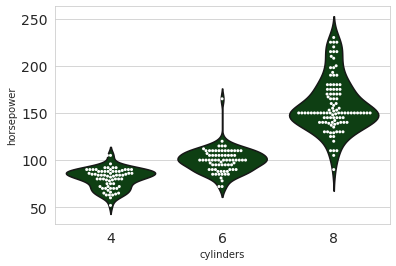

In [ ]:
sns.violinplot(x=usa.cylinders, y=usa.horsepower, scale='width', inner=None, color='xkcd:forest green' )
sns.swarmplot(x=usa.cylinders, y=usa.horsepower,color='white', size=3 );

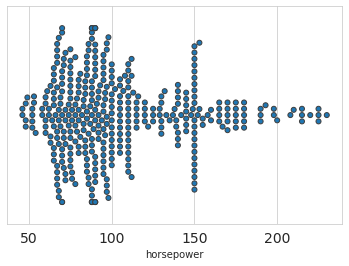

In [ ]:
sns.swarmplot(cars.horsepower, linewidth=1);

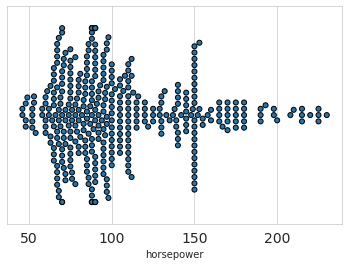

In [ ]:
sns.swarmplot(cars.horsepower, linewidth=1, edgecolor='black');

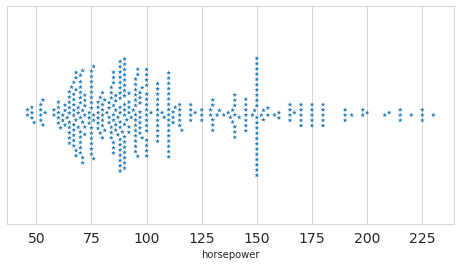

In [ ]:
plt.figure(figsize=(8, 4))
sns.swarmplot(cars.horsepower, marker='*');

# **stripplot**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
cars = sns.load_dataset('mpg').dropna()
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
import pandas as pd
import numpy as np
sns.set_style('white')
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

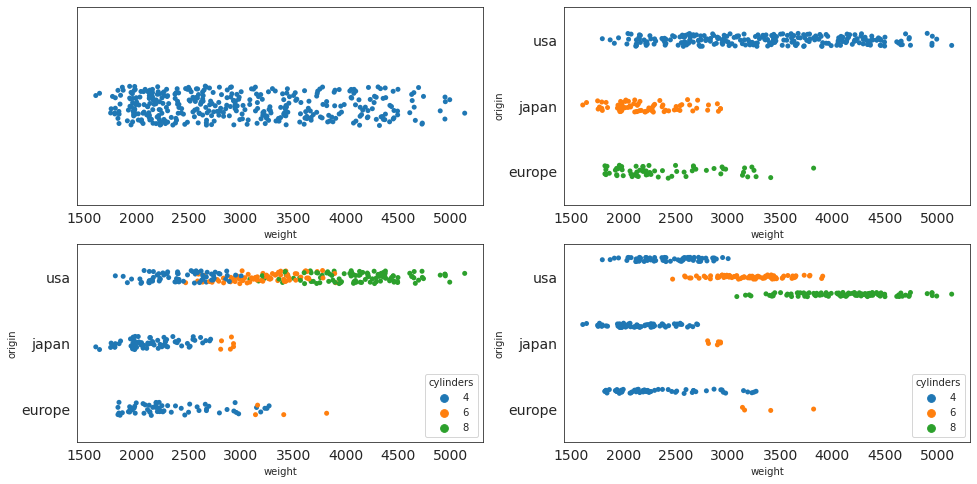

In [ ]:
cars = cars[cars.cylinders.isin([4,6,8])]
plt.figure(figsize=(16,8))

plt.subplot(221)
sns.stripplot(cars.weight);
plt.subplot(222)
sns.stripplot(cars.weight, cars.origin);
plt.subplot(223)
sns.stripplot(x ='weight', y='origin', hue='cylinders', data=cars);
plt.subplot(224)
sns.stripplot(x ='weight', y='origin', hue='cylinders', data=cars,dodge=True);             

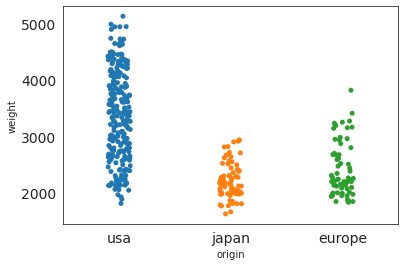

In [ ]:
sns.stripplot(x='origin', y='weight', data=cars);

## **Styling**

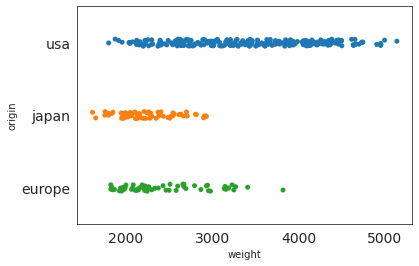

In [ ]:
# jitter
sns.set_style('white')
sns.stripplot(cars.weight, cars.origin, jitter=0.05);

In [ ]:
from ipywidgets import interactive
def jitter_widget(jitter=0.1):
    sns.stripplot(cars.weight, cars.origin, jitter=jitter)
interactive(jitter_widget, jitter=(0, 0.65, 0.05))

interactive(children=(FloatSlider(value=0.1, description='jitter', max=0.65, step=0.05), Output()), _dom_class…

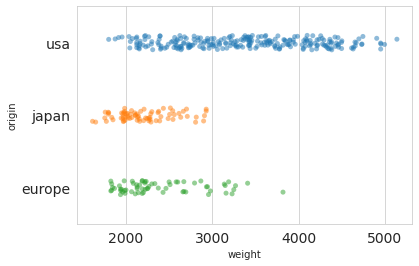

In [ ]:
# alpha
sns.set_style('whitegrid')
sns.stripplot(cars.weight, cars.origin, alpha=0.5);

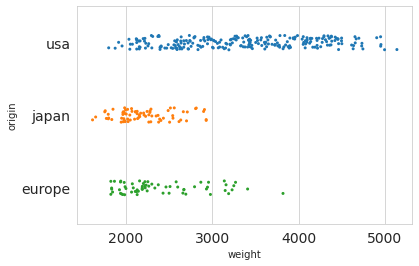

In [ ]:
# size
sns.stripplot(cars.weight, cars.origin, alpha=1, size=3 );

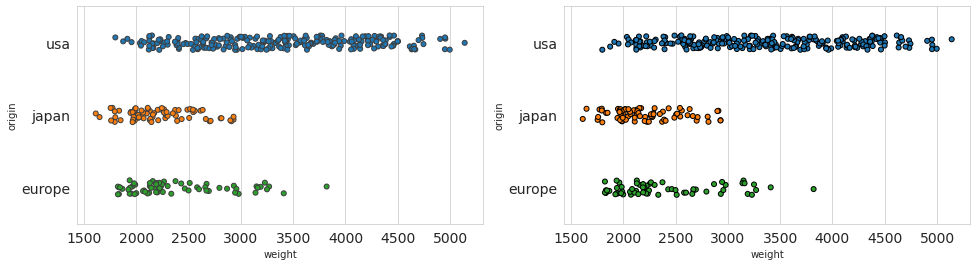

In [ ]:
# linewidth, edgecolor
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.stripplot(cars.weight, cars.origin, linewidth=1);
plt.subplot(122)
sns.stripplot(cars.weight, cars.origin, linewidth=1, edgecolor='black');

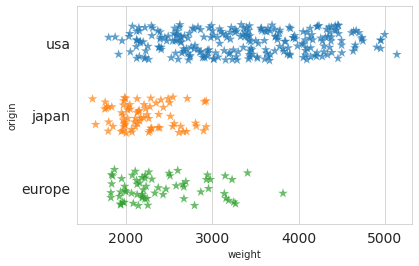

In [ ]:
# marker
sns.stripplot(cars.weight, cars.origin, alpha=0.7, size=10, jitter=0.25, marker='*' );

## **other examples** 

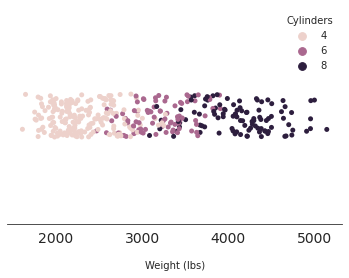

In [ ]:
sns.set_style('white')
sns.stripplot(cars.weight, ['']*len(cars), hue=cars.cylinders, 
              palette=sns.cubehelix_palette(3));
sns.despine(left=True)
plt.xlabel('\nWeight (lbs)')
plt.legend(title='Cylinders', frameon=False);

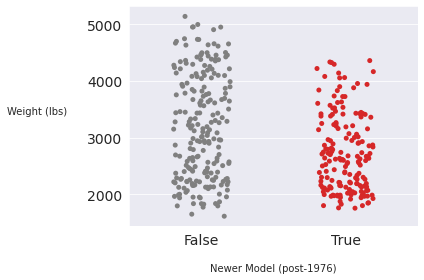

In [ ]:
sns.set_style('darkgrid')
cars['newer_model'] = [True if mod_year > 76 else False for mod_year in cars.model_year]

sns.stripplot(cars.newer_model, cars.weight, jitter=0.2, palette=['gray', red]);
plt.xlabel('\nNewer Model (post-1976)')
plt.ylabel('Weight (lbs)', rotation=0, labelpad=50)
plt.tight_layout();

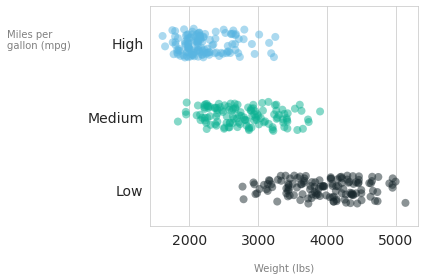

In [ ]:
cars['mpg_range'] = ['Low' if m < 19 else ('Medium' if m < 27 else 'High') for m in cars.mpg]

sns.set_style('whitegrid')
sns.stripplot(cars.weight, cars.mpg_range, 
              order=['High', 'Medium', 'Low'],
              jitter=0.2,
              palette=["#58b5e1", "#0db293", "#19282d"],
              alpha=0.5,
              size=8
             )
plt.xlabel('\nWeight (lbs)', color='gray')
plt.ylabel('Miles per\ngallon (mpg)', 
           rotation=0, 
           labelpad=80, 
           ha='left', 
           position=(-.1, .8),
           color='gray'
          )
plt.tight_layout();

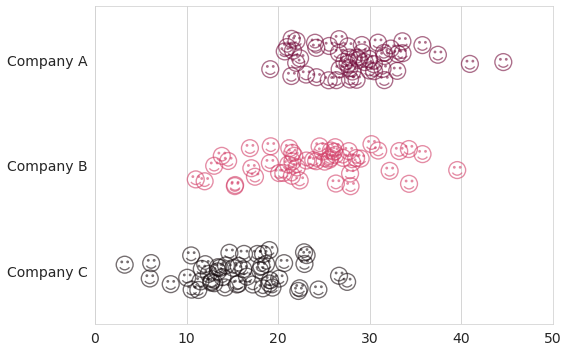

In [ ]:
import random
random.seed(11)

points = 50
data = [random.gauss(28, 5) for _ in range(points)]
data.extend([random.gauss(20, 8) for _ in range(points)])
data.extend([random.gauss(15, 5) for _ in range(points)])
company = ['Company A']*points + ['Company B']*points + ['Company C']*points

plt.figure(figsize=(8,5))
sns.stripplot(x=data, y=company, 
              jitter=0.2, 
              alpha=0.6, 
              size=20, 
              marker=r'$☺$',
              palette=["#750e3d", "#d34069", "#190e11"]
             );
for pos in ['left', 'right', 'top', 'bottom']:
    plt.gca().spines[pos].set_edgecolor('lightgray')
plt.xticks([0, 10, 20, 30, 40, 50])
plt.tight_layout();

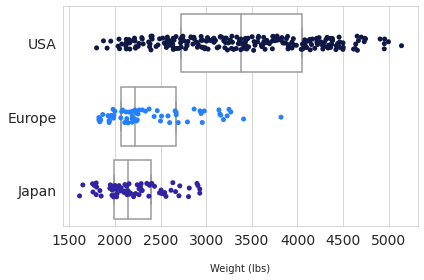

In [ ]:
sns.boxplot(cars.weight, cars.origin, whis=0, color='white', fliersize=0, order=['usa', 'europe', 'japan'])
sns.stripplot(cars.weight, cars.origin, palette=["#0f1745", "#2580fe", "#3123a1"], order=['usa', 'europe', 'japan'])
plt.xlabel('\nWeight (lbs)')
plt.ylabel('')
plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

# **scatter plot**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
diamonds = sns.load_dataset('diamonds')
print(diamonds.shape)
diamonds.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds = diamonds[
            diamonds.cut.isin(['Premium', 'Good']) & 
            diamonds.color.isin(['D', 'F', 'J'])
            ].sample(n=100, random_state=22)

diamonds.shape

(100, 10)

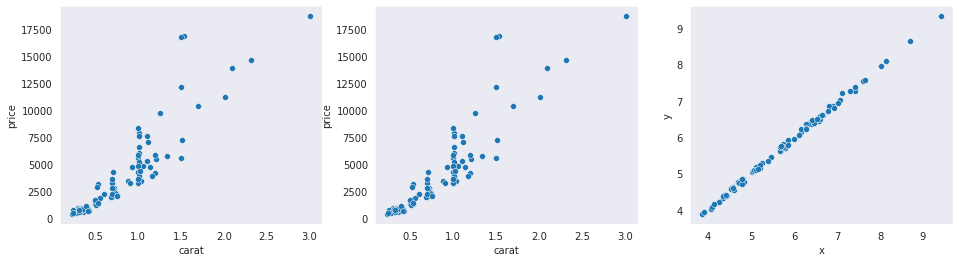

In [ ]:
sns.set_style('dark')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(16,4))
plt.subplot(131)
sns.scatterplot(diamonds.carat, diamonds.price);

plt.subplot(132)
sns.scatterplot(x='carat', y='price', data=diamonds);

plt.subplot(133)
sns.scatterplot(x='x', y='y', data=diamonds);

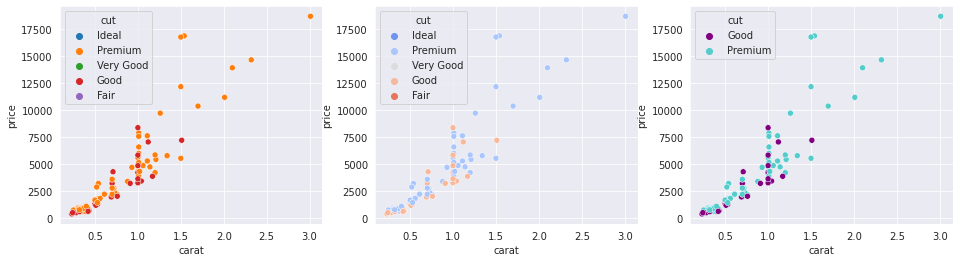

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.scatterplot(x='carat', y='price', hue='cut',data=diamonds );

plt.subplot(132)
sns.scatterplot(x='carat', y='price', hue='cut',
                data=diamonds,
                palette= sns.color_palette('coolwarm', n_colors=5)
               );
# palette=sns.color_palette('bright', s.C.unique().shape[0]               
plt.subplot(133)
sns.scatterplot(x='carat', y='price', hue='cut',
                data=diamonds,
                palette = ['purple', '#55CCCC'],
                hue_order=['Good', 'Premium']
               );

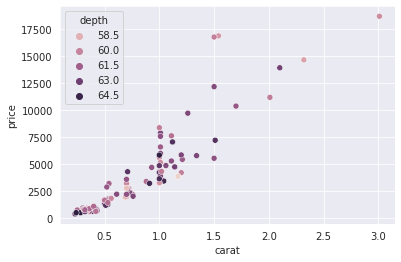

In [ ]:
sns.scatterplot(x='carat', y='price', hue='depth',
                data=diamonds);

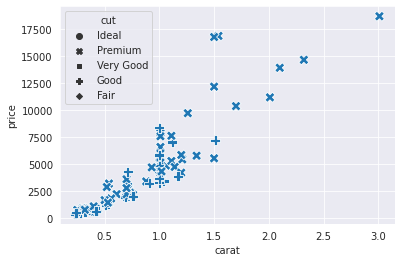

In [ ]:
# Style
sns.scatterplot(x='carat', y='price', style='cut',
                data=diamonds,s=100);

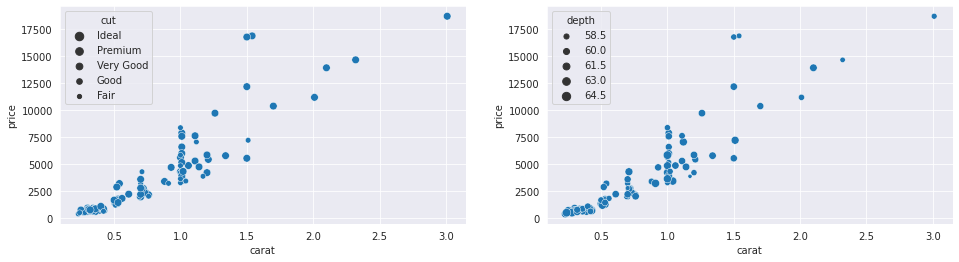

In [ ]:
#size
plt.figure(figsize=(16,4))

plt.subplot(121)
sns.scatterplot(x='carat', y='price', size='cut',
                data=diamonds);

plt.subplot(122)
sns.scatterplot(x='carat', y='price', size='depth',
                data=diamonds);                              

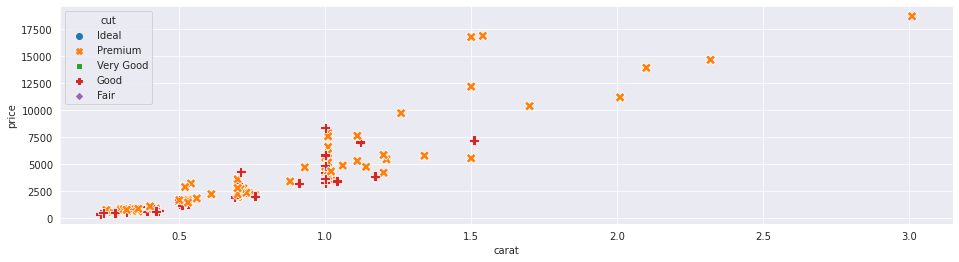

In [ ]:
# hue + style + size
plt.figure(figsize=(16,4))
sns.scatterplot(x='carat', y='price', hue='cut', style='cut', data=diamonds, s=100 );

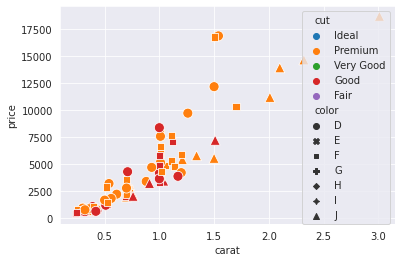

In [ ]:
sns.scatterplot(x='carat', y='price', hue='cut', style='color', data=diamonds, s=100);

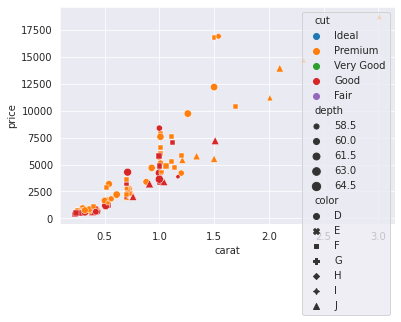

In [ ]:
sns.scatterplot(x='carat', y='price', hue='cut', style='color',  size='depth', data=diamonds);   

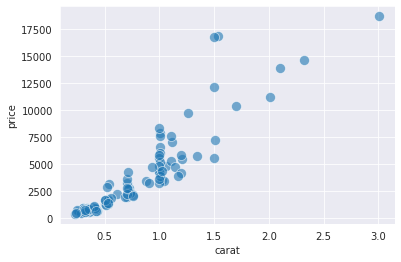

In [ ]:
# alpha
sns.scatterplot(x='carat', y='price',data=diamonds,
                s=100, alpha=0.6 );

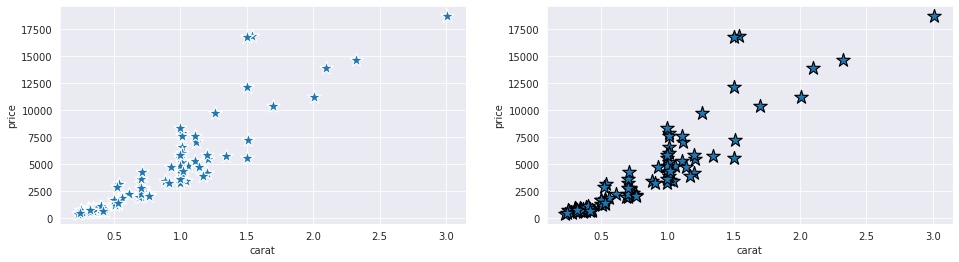

In [ ]:
# marker

plt.figure(figsize=(16,4))
plt.subplot(121)
sns.scatterplot(x='carat', y='price', data=diamonds, 
                s=200, marker='*');

plt.subplot(122)
sns.scatterplot(x='carat', y='price', data=diamonds, s=200, 
                marker='*', edgecolor='black');               